In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline
## Data Cleaning

# Whale Returns - Read the Whale Portfolio daily returns and clean the data
# Reading whale returns
WR_path = Path("../pandas-hw/whale_returns.csv")
WR_daily_returns = pd.read_csv(WR_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Count nulls
WR_daily_returns = WR_daily_returns.sort_index()
WR_daily_returns.isnull().sum()
# Drop nulls
WR_daily_returns = WR_daily_returns.dropna()

# Algorithmic Daily Returns - Read the algorithmic daily returns and clean the data.
# Reading whale returns
ADR_path = Path("../pandas-hw/algo_returns.csv")
ADR_daily_returns = pd.read_csv(ADR_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Count nulls
ADR_daily_returns = ADR_daily_returns.sort_index()
ADR_daily_returns.isnull().sum()
# Drop nulls
ADR_daily_returns = ADR_daily_returns.dropna()

# S&P TSX 60 Returns - Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 
# Reading whale returns
SPTR_path = Path("../pandas-hw/sp_tsx_history.csv")
SPTR_data = pd.read_csv(SPTR_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Count nulls
SPTR_data = SPTR_data.sort_index()
SPTR_data.isnull().sum()
# Drop nulls
SPTR_data = SPTR_data.dropna()
# Check Data Types
SPTR_data.dtypes

Close    object
dtype: object

In [2]:
# Fix Data Types
#SPTR_data = SPTR_data.
SPTR_data['Close'] = SPTR_data['Close'].str.replace('$','',regex = True)
SPTR_data['Close'] = SPTR_data['Close'].str.replace(',','',regex = True)
SPTR_data.head()
SPTR_data.dtypes

SPTR_data['Close']= SPTR_data['Close'].astype('float')
SPTR_data.dtypes

Close    float64
dtype: object

In [3]:
# Calculate Daily Returns
SPTR_daily_returns = SPTR_data.pct_change()
SPTR_daily_returns.head()
# Drop nulls
SPTR_data.dropna()

# Rename `Close` Column to be specific to this portfolio.
SPTR_daily_returns = SPTR_daily_returns.rename(columns = {"Close":"S&P Returns"})
SPTR_daily_returns

,S&P Returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [4]:
## Combine Whale, Algorithmic, and S&P TSX 60 Returns
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

Jt_R_daily_return = pd.concat([WR_daily_returns, ADR_daily_returns, SPTR_daily_returns],axis = "columns")

<AxesSubplot:title={'center':'Daily Returns across portfolio'}, xlabel='Date'>

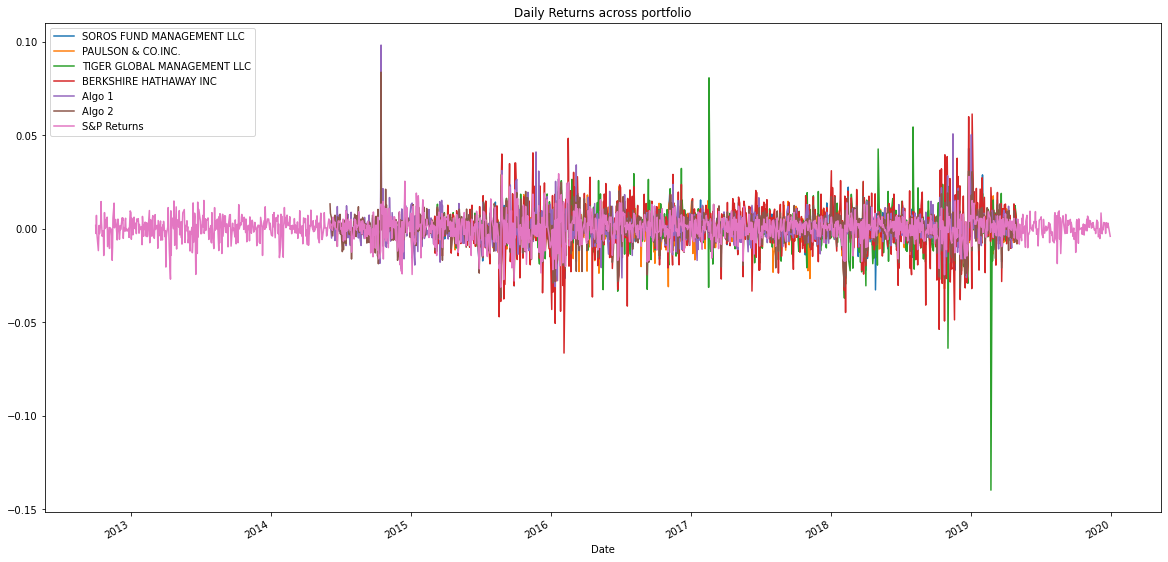

In [5]:
## Conduct Quantitative Analysis - Performance Analysis
# Plot daily returns of all portfolios
ax = WR_daily_returns.plot(figsize=(20, 10), title="Daily Returns across portfolio")
ADR_daily_returns.plot(ax=ax)
SPTR_daily_returns.plot(ax=ax)

In [6]:
# Calculate cumulative returns of all portfolios
cum_ret_WR = (1+WR_daily_returns).cumprod() - 1
cum_ret_ADR = (1+ADR_daily_returns).cumprod() - 1
cum_ret_SPTR = (1+SPTR_daily_returns).cumprod() - 1

<AxesSubplot:title={'center':'Cumulative Returns across portfolio'}, xlabel='Date'>

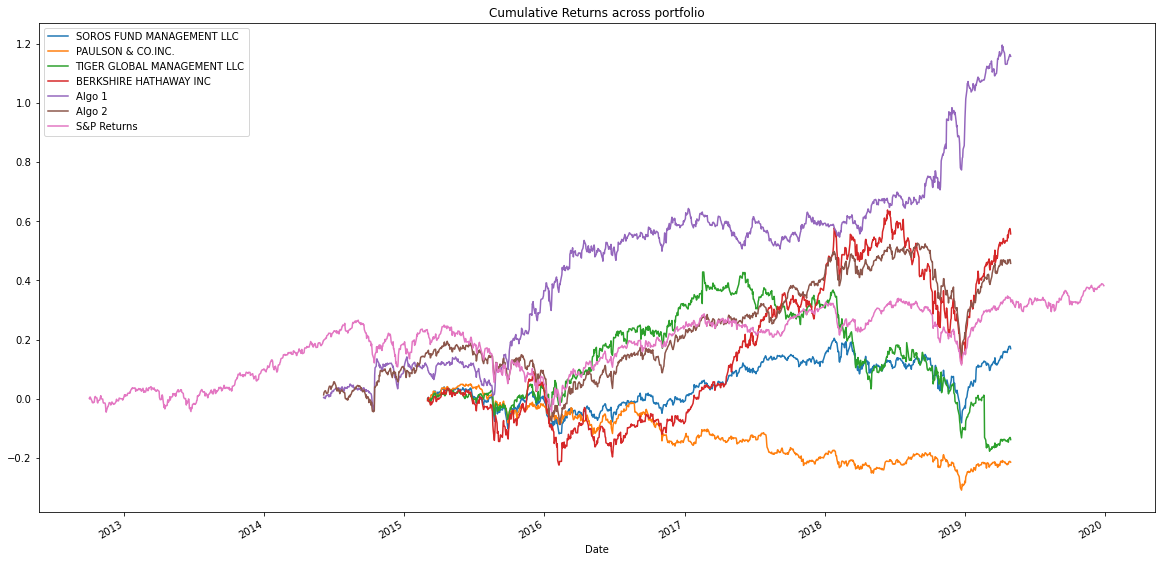

In [7]:
# plot cumulative returns
ay = cum_ret_WR.plot(figsize=(20, 10), title="Cumulative Returns across portfolio")
cum_ret_ADR.plot(ax = ay)
cum_ret_SPTR.plot(ax = ay)

<AxesSubplot:>

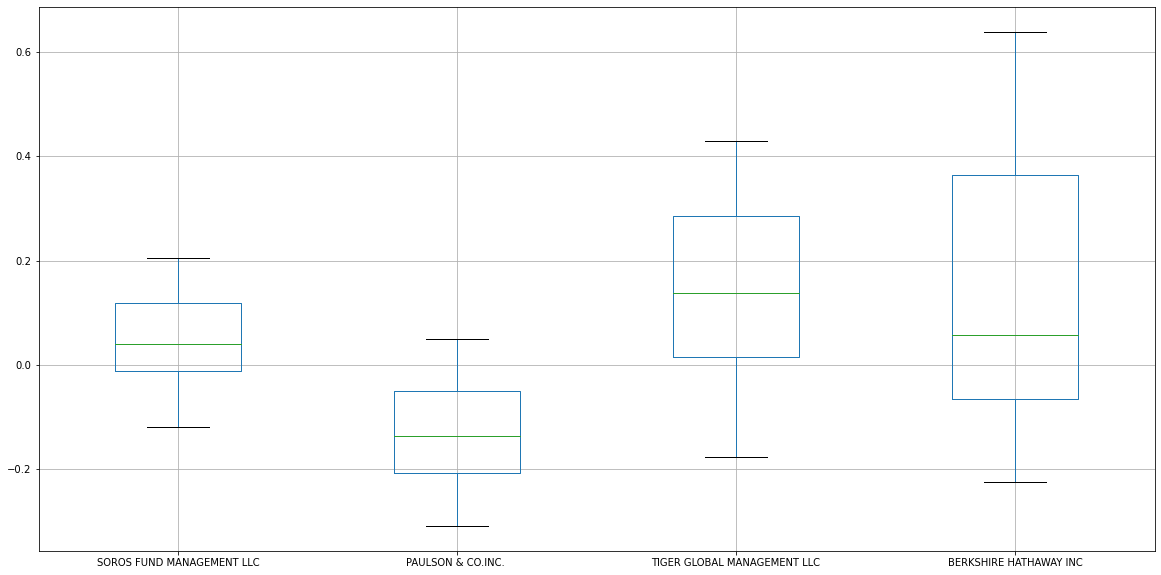

In [8]:
## Risk Analysis
# Box plot to visually show risk for each portfolio
cum_ret_WR.boxplot(figsize=(20, 10))

<AxesSubplot:>

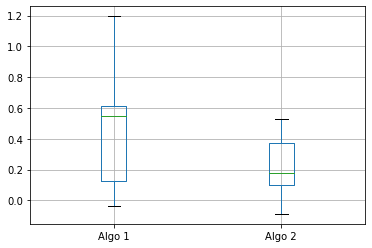

In [9]:
cum_ret_ADR.boxplot()

<AxesSubplot:>

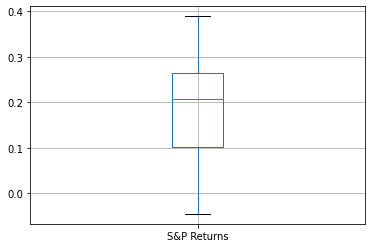

In [10]:
cum_ret_SPTR.boxplot()

In [11]:
# Calculate the daily standard deviations of all portfolios
WR_daily_returns.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [12]:
ADR_daily_returns.std()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [13]:
# Calculate  the daily standard deviation of S&P TSX 60
SPTR_daily_returns.std()

S&P Returns    0.006637
dtype: float64

In [14]:
## Determine which portfolios are riskier than the S&P TSX 60
# Soros Fund, Paulson & Co. Algo 1, Algo 2 are all riskier than S&P TSX 60

In [15]:
# Calculate the annualized standard deviation (252 trading days)
Ann_STD_WR = WR_daily_returns.std()*np.sqrt(252)
Ann_STD_WR

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [16]:
Ann_STD_ADR = ADR_daily_returns.std()*np.sqrt(252)
Ann_STD_ADR

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [17]:
Ann_STD_SPTR = SPTR_daily_returns.std()*np.sqrt(252)
Ann_STD_SPTR

S&P Returns    0.105365
dtype: float64

In [18]:
## Rolling Statistics
# Calculate the rolling standard deviation for all portfolios using a 21-day window
WR_std_data = WR_daily_returns.rolling(window=21).std()
ADR_std_data = ADR_daily_returns.rolling(window=21).std()
SPTR_std_data = SPTR_daily_returns.rolling(window=21).std()

<AxesSubplot:xlabel='Date'>

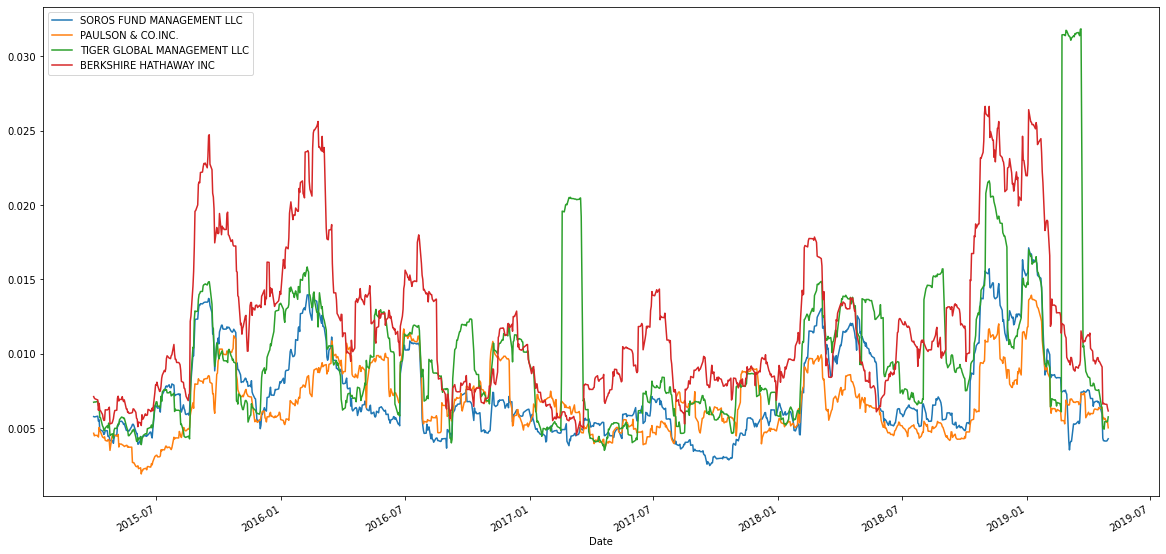

In [19]:
# Plot the rolling standard deviation
WR_std_data.plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

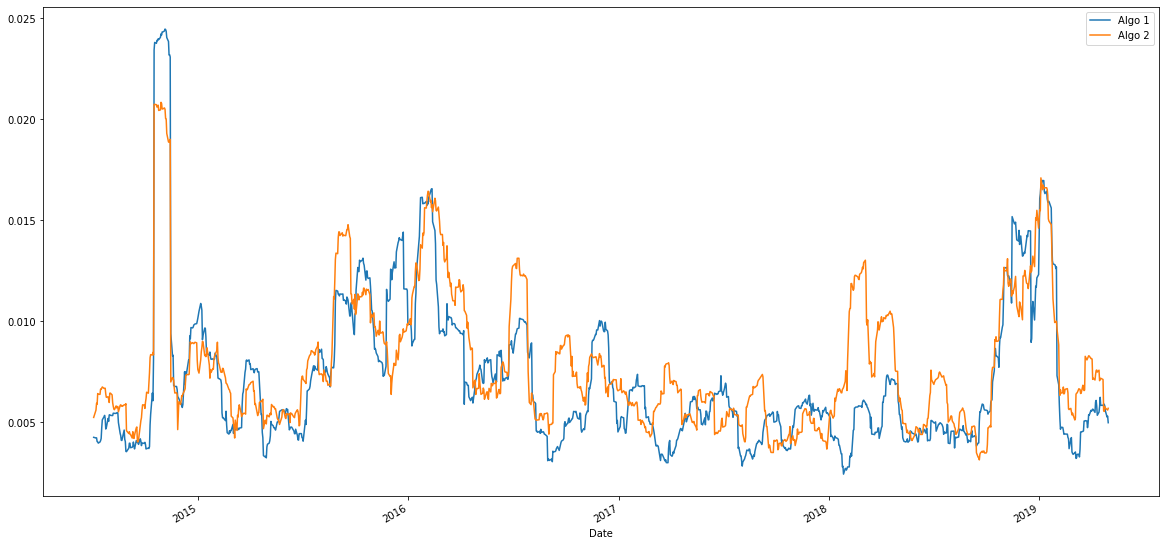

In [20]:
ADR_std_data.plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

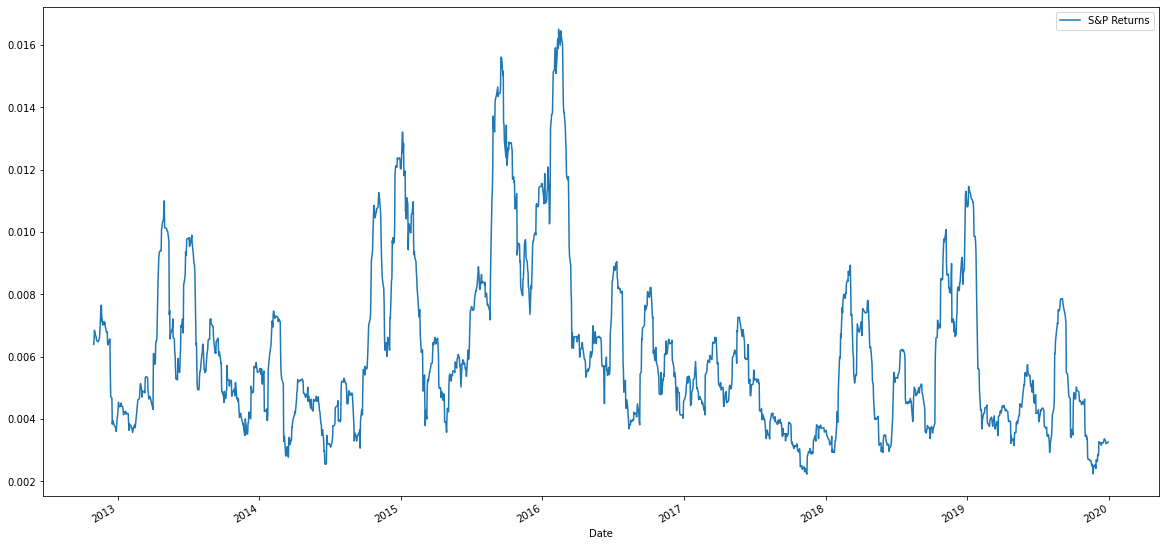

In [21]:
SPTR_std_data.plot(figsize=(20, 10))

In [22]:
# Calculate the correlation
Jt_Correlation = Jt_R_daily_return.corr()
Jt_Correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,0.321366,0.826719,0.671796
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.269257,0.677993,0.485006
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,0.164840,0.508139,0.439204
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,0.292307,0.687717,0.555474
Algo 1,0.321366,0.269257,0.164840,0.292307,1.000000,0.346568,0.318075
Algo 2,0.826719,0.677993,0.508139,0.687717,0.346568,1.000000,0.709484
S&P Returns,0.671796,0.485006,0.439204,0.555474,0.318075,0.709484,1.000000


<AxesSubplot:>

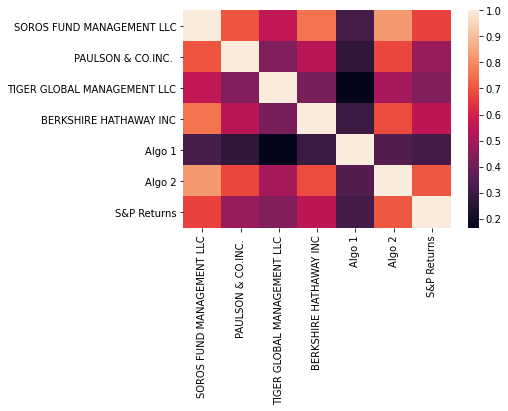

In [23]:
# Display de correlation matrix
sns.heatmap(Jt_Correlation)

<AxesSubplot:title={'center':'Beta between Berkshire Hathaway fund and S & P TSX 60 fund'}, xlabel='Date'>

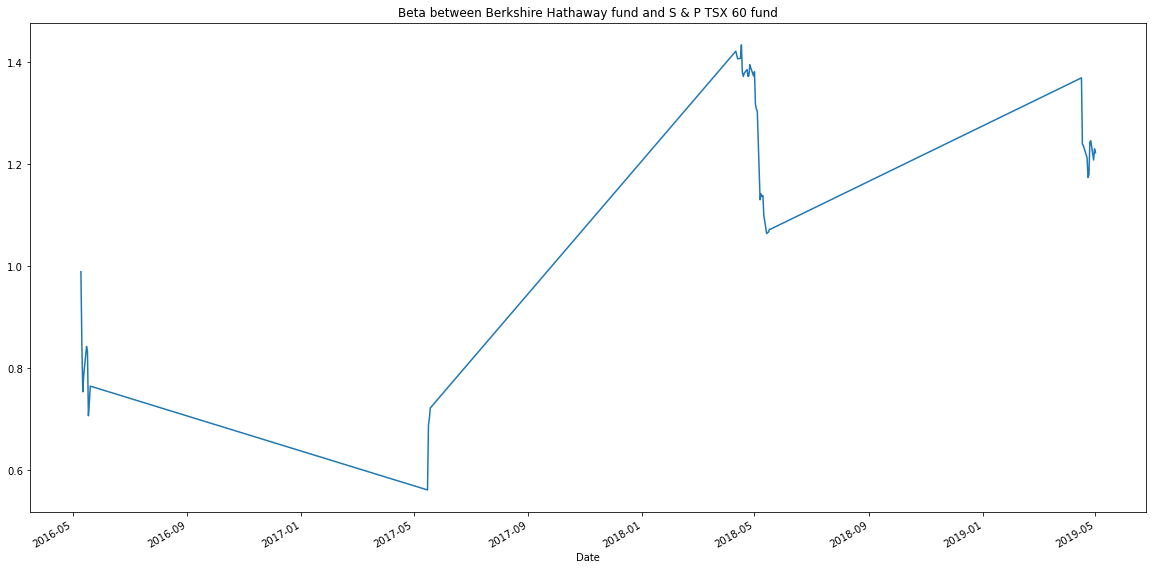

In [24]:
# Calculate covariance of a single portfolio
Cov_Berk = Jt_R_daily_return['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(Jt_R_daily_return["S&P Returns"])
Cov_Berk_1 = Cov_Berk.dropna()

# Calculate variance of S&P TSX
vari = Jt_R_daily_return["S&P Returns"].rolling(window = 60).var()
variance = vari.dropna()

# Computing beta for rolling 60 day against S&P TSX 60
Berk_Beta = Cov_Berk_1/variance
Berk_Beta1 = Berk_Beta.dropna()

# Plot beta trend
Berk_Beta1.plot(figsize=(20, 10), title = "Beta between Berkshire Hathaway fund and S & P TSX 60 fund")

<AxesSubplot:title={'center':'EVM for 21 day rolling'}, xlabel='Date'>

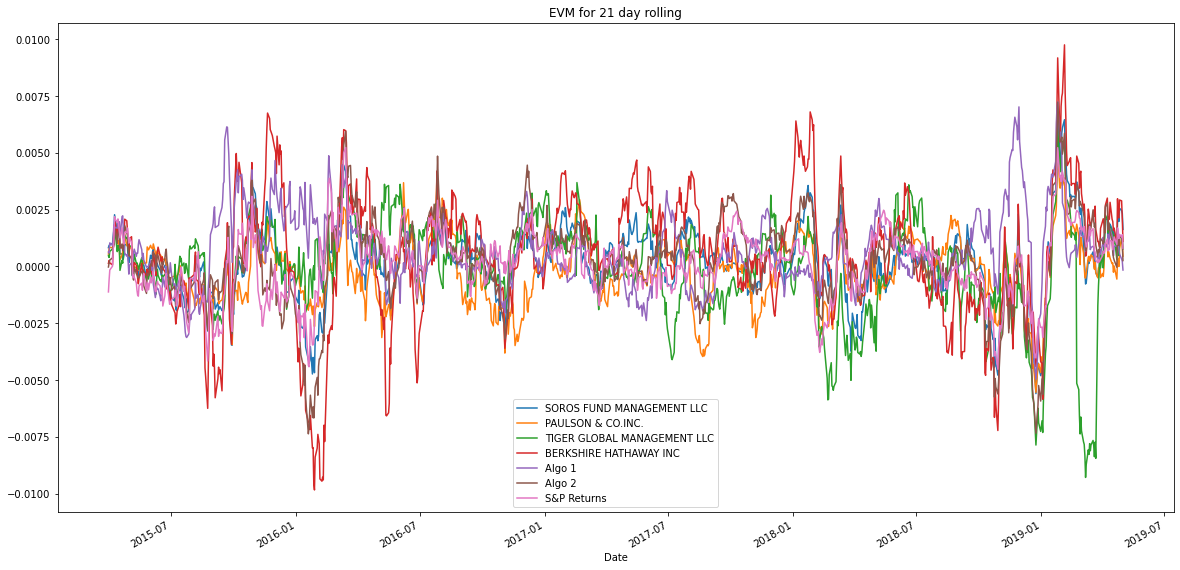

In [25]:
## Rolling Statistics Challenge
# Use `ewm` to calculate the rolling window
WR_evm_data = WR_daily_returns.rolling(window=21).mean()
ADR_evm_data = ADR_daily_returns.rolling(window=21).mean()
SPTR_evm_data = SPTR_daily_returns.rolling(window=21).mean()
Jt_evm_data = pd.concat([WR_evm_data, ADR_evm_data, SPTR_evm_data], axis = "columns" )
Jt_evm_data1 = Jt_evm_data.dropna()
Jt_evm_data1.plot(figsize=(20, 10), title = "EVM for 21 day rolling")

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (Jt_R_daily_return.mean() * 252) / (Jt_R_daily_return.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.300176
Algo 2                         0.639258
S&P Returns                    0.478866
dtype: float64

<AxesSubplot:>

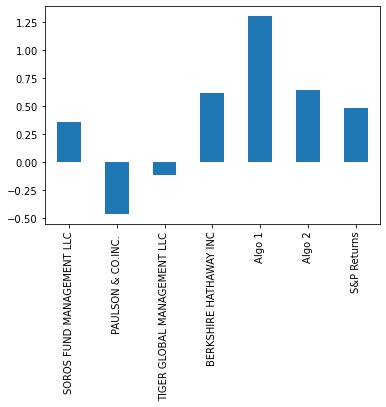

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

In [28]:
# Based on the Sharpe Ratios - the Algo 1 & Algo 2 strategy outperforms the whale portfolios. 

In [29]:
## Choose 3-5 custom stocks
# Reading data from 1st stock
SU_path = Path("../pandas-hw/SU.csv")
SU_data = pd.read_csv(SU_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Count nulls
SU_data.isnull().sum()
SU_daily_returns = SU_data.pct_change()
SU_daily_returns = SU_daily_returns.rename(columns = {"Close":"Suncor Energy Inc"})

# Reading data from 2nd stock
MFC_path = Path("../pandas-hw/MFC.csv")
MFC_data = pd.read_csv(MFC_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Count nulls
MFC_data.isnull().sum()
MFC_daily_returns = MFC_data.pct_change()
MFC_daily_returns = MFC_daily_returns.rename(columns = {"Close":"Manulife Fin Corp"})

# Reading data from 3rd stock
RY_path = Path("../pandas-hw/RY.csv")
RY_data = pd.read_csv(RY_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Count nulls
RY_data.isnull().sum()
RY_daily_returns = RY_data.pct_change()
RY_daily_returns = RY_daily_returns.rename(columns = {"Close":"RBC"})


In [30]:
# Combine all stocks in a single DataFrame
Jt_CP_daily_returns = pd.concat([SU_daily_returns, MFC_daily_returns, RY_daily_returns],axis = "columns")
Jt_CP_daily_returns.dropna()

,Suncor Energy Inc,Manulife Fin Corp,RBC
Date,,,
2012-02-10,0.006926,0.003314,-0.000692
2012-03-10,-0.009270,-0.000826,-0.001731
2012-04-10,0.021129,0.027273,0.016300
2012-05-10,-0.004138,0.010459,0.001365
2012-08-10,-0.012763,-0.011146,-0.003749
...,...,...,...
2019-12-20,-0.012573,0.013118,0.001263
2019-12-23,0.008385,-0.002988,-0.006814
2019-12-24,-0.002464,-0.000500,-0.001398


In [31]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
CP_portfolio_returns = Jt_CP_daily_returns.dot(weights)

# Display sample data
CP_portfolio_returns.head()


Date
2012-01-10         NaN
2012-02-10    0.003183
2012-03-10   -0.003942
2012-04-10    0.021567
2012-05-10    0.002562
dtype: float64

In [32]:
# Join your returns DataFrame to the original returns DataFrame
Jt_daily_returns = pd.concat([CP_portfolio_returns, Jt_R_daily_return],axis = "columns")
Jt_daily_returns.columns = ["CUSTOM", "SOROS","PAULSON","TIGER","BERKSHIRE","ALGO 1","ALGO 2", "S&P"]

In [33]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Jt_daily_returns.dropna()

,CUSTOM,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,S&P
Date,,,,,,,,
2015-03-03,-0.001707,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-06,0.010745,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.008716,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-11,0.013629,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,-0.007768,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
...,...,...,...,...,...,...,...,...
2019-04-24,-0.026466,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972
2019-04-25,0.003049,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.002265,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254


In [34]:
## Rerun risk analysis
# Calculate the annualized `std`
Jt_all_STD = Jt_daily_returns.std()*np.sqrt(252)
Jt_all_STD

CUSTOM       0.182454
SOROS        0.124487
PAULSON      0.110754
TIGER        0.171830
BERKSHIRE    0.203682
ALGO 1       0.126801
ALGO 2       0.134401
S&P          0.105365
dtype: float64

In [35]:
# Calculate rolling standard deviation window of 21 days
Jt_returns=Jt_daily_returns.dropna()
Jt_std = Jt_returns.rolling(window=21).std()

<AxesSubplot:xlabel='Date'>

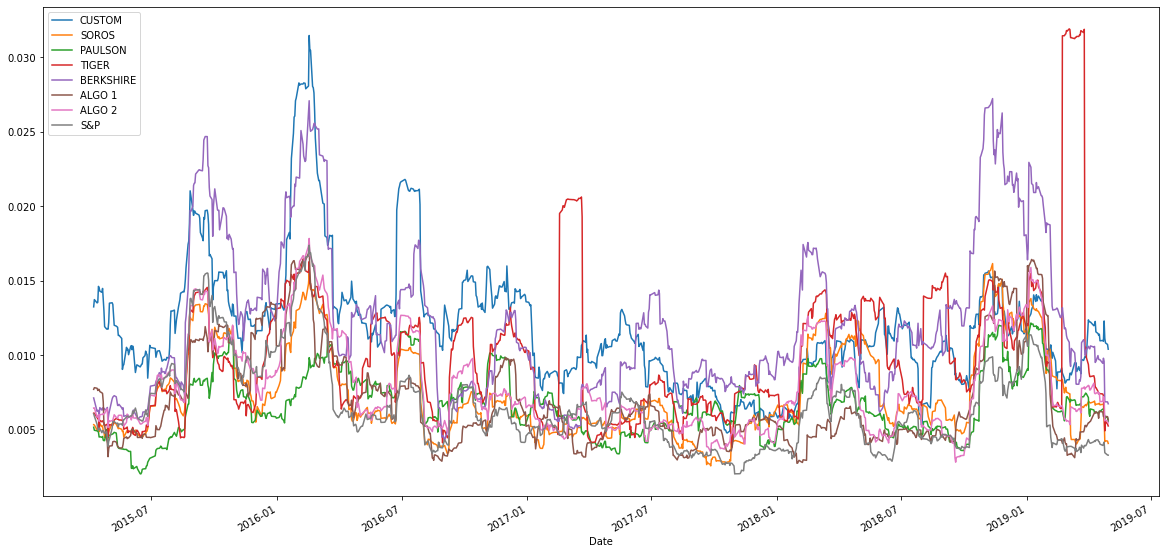

In [36]:
# Plot rolling standard deviation
Jt_std.plot(figsize=(20, 10))

In [37]:
# Calculate and plot the correlation
Jt_Corr = Jt_returns.corr()
Jt_Corr

,CUSTOM,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,S&P
CUSTOM,1.000000,0.474472,0.365020,0.313865,0.379831,0.266407,0.511953,0.624230
SOROS,0.474472,1.000000,0.708868,0.567269,0.756400,0.316850,0.834038,0.679683
PAULSON,0.365020,0.708868,1.000000,0.447852,0.562976,0.283418,0.700515,0.522417
TIGER,0.313865,0.567269,0.447852,1.000000,0.424093,0.164637,0.514619,0.448622
BERKSHIRE,0.379831,0.756400,0.562976,0.424093,1.000000,0.302853,0.692853,0.567535
ALGO 1,0.266407,0.316850,0.283418,0.164637,0.302853,1.000000,0.289875,0.315851
ALGO 2,0.511953,0.834038,0.700515,0.514619,0.692853,0.289875,1.000000,0.741541
S&P,0.624230,0.679683,0.522417,0.448622,0.567535,0.315851,0.741541,1.000000


<AxesSubplot:>

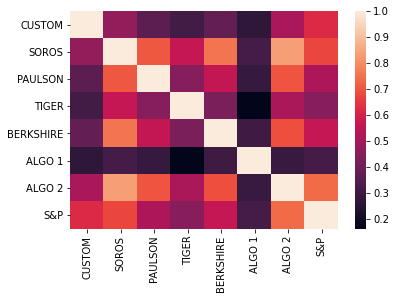

In [38]:
sns.heatmap(Jt_Corr)

<AxesSubplot:title={'center':'Beta between Custom Portfolio and S & P TSX 60'}, xlabel='Date'>

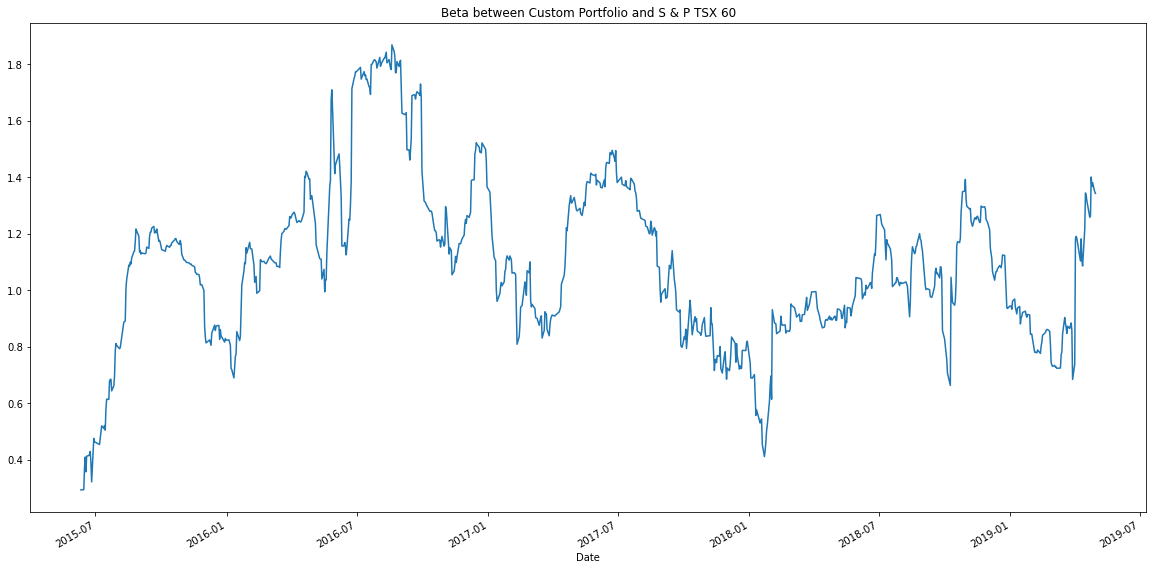

In [39]:
## Calc and plot 60 day rolling beta for custom portfolio to S&P 60 TSX
# Calculate and plot Beta
Cov_Custom = Jt_returns['CUSTOM'].rolling(window = 60).cov(Jt_returns["S&P"])
Cov_Custom_PF = Cov_Custom.dropna()

# Calculate variance of S&P TSX
vari_Custom = Jt_returns["S&P"].rolling(window = 60).var()
vari_Custom_PF = vari_Custom.dropna()

# Computing beta for rolling 60 day against S&P TSX 60
Custom_Beta = Cov_Custom_PF/vari_Custom_PF
Custom_Beta_1 = Custom_Beta.dropna()

# Plot beta trend
Custom_Beta_1.plot(figsize=(20, 10), title = "Beta between Custom Portfolio and S & P TSX 60")


In [40]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (Jt_daily_returns.mean() * 252) / (Jt_daily_returns.std() * np.sqrt(252))
sharpe_ratio

CUSTOM       0.338053
SOROS        0.361568
PAULSON     -0.462131
TIGER       -0.118257
BERKSHIRE    0.619628
ALGO 1       1.300176
ALGO 2       0.639258
S&P          0.478866
dtype: float64

<AxesSubplot:>

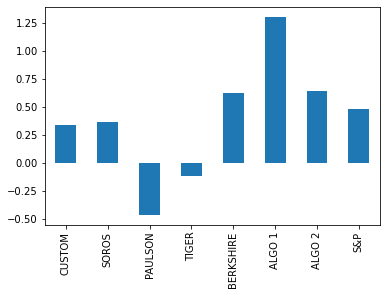

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

In [42]:
## How does your portfolio do?

